In [1]:
%run datasetGenerator.py --ID 1002069069

Exception: File `'datasetGenerator.py'` not found.

In [4]:
data = pd.read_csv('/Users/ankit/Downloads/1002069069.csv')

In [27]:
#while writing this homework assignment, I did not recall how to access a single value form row/column
#I reffered to https://note.nkmk.me/en/python-pandas-at-iat-loc-iloc/ for help
import scipy.stats as st
import pandas as pd
import numpy as np
c = 0
i = 0
effective_p_value = 5e-8
results = []
while i < 1000:
    odd_ratio, p = st.fisher_exact([[data.iat[i,1], data.iat[i,2]], [data.iat[i,3], data.iat[i,4]]], alternative='greater')
    sig = 'True' if p < effective_p_value else 'False'
    results.append({'P': p, 'Significant': sig})
    if odd_ratio > 1:
        c += 1
    i += 1
dataset = pd.DataFrame(results)
sig_count = dataset['Significant'].value_counts()['True']
print("The Significant SNPs count is:", sig_count)
dataset.to_csv("result.csv", header=True, index=False)
print(dataset)

The Significant SNPs count is: 164
                P Significant
0    8.425372e-14        True
1    3.432733e-01       False
2    9.999995e-01       False
3    9.999782e-01       False
4    5.796643e-03       False
..            ...         ...
995  9.942883e-01       False
996  3.602543e-02       False
997  3.349867e-07       False
998  3.140935e-06       False
999  9.527255e-01       False

[1000 rows x 2 columns]


In [49]:
n = 1000
results = []
effective_p_value = 5e-8/n
print(effective_p_value)
i = 0
while i < 1000:
    if dataset.at[i, "P"] < effective_p_value:
        results.append("True")
    else:
        results.append("False")
    i += 1
dataset["Significant_Bonferroni_SNP"] = results
bonferroni_count = dataset["Significant_Bonferroni_SNP"].value_counts()["True"]
print("The Significant SNPs count of Bonferroni corrected P value is:", bonferroni_count)
dataset.to_csv("result.csv", header=True, index=False)
print(dataset)

4.9999999999999995e-11
The Significant SNPs count of Bonferroni corrected P value is: 114
                P Significant Significant_Bonferroni_SNP
0    8.425372e-14        True                       True
1    3.432733e-01       False                      False
2    9.999995e-01       False                      False
3    9.999782e-01       False                      False
4    5.796643e-03       False                      False
..            ...         ...                        ...
995  9.942883e-01       False                      False
996  3.602543e-02       False                      False
997  3.349867e-07       False                      False
998  3.140935e-06       False                      False
999  9.527255e-01       False                      False

[1000 rows x 3 columns]


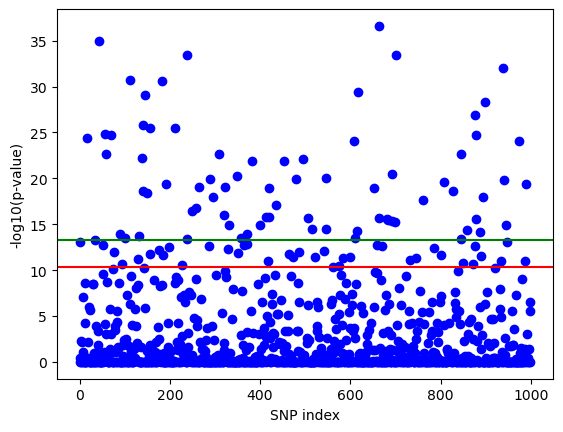

In [60]:
#while writing this assignment, I did not recall how to generate manhattan plot so I reffered to the below page
#https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(dataset.index, -np.log10(dataset["P"]), color='blue')
ax.axhline(-np.log10(effective_p_value), color='red', linestyle='-')
ax.axhline(-np.log10(effective_p_value/n), color='green', linestyle='-')
ax.set_xlabel("SNP index")
ax.set_ylabel("-log10(p-value)")
plt.show()